# Name: Ganesh A

# Task Name: Prediction using Decision Tree Algorithm

# Problem Statement: Create the Decision Tree Classifier and visualize it graphically 

## Importing Packages

In [5]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.metrics import classification_report
from IPython.display import Image
plt.rcParams['figure.figsize'] = [15,8]

In [6]:
iris = pd.read_csv('C:/Users/ganesh/Desktop/Iris.csv')

In [7]:
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
iris.shape

(150, 6)

In [9]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
iris.describe(include='object')

,Species
count,150
unique,3
top,Iris-setosa
freq,50


<AxesSubplot:>

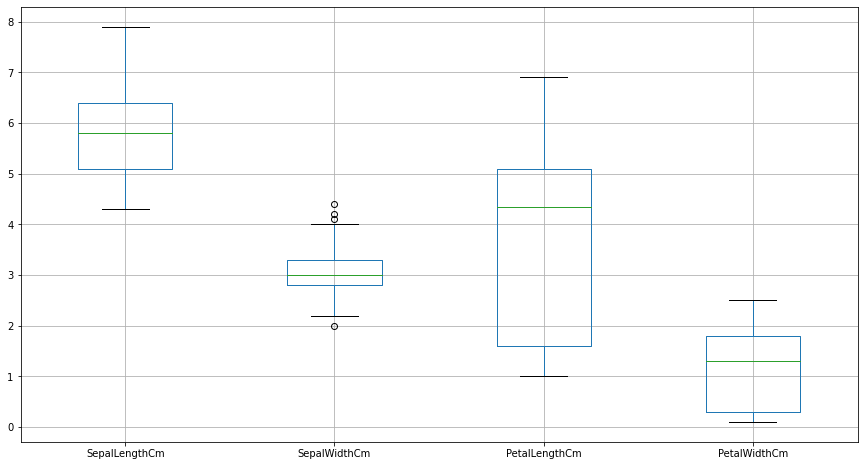

In [33]:
iris.drop(['Id'],axis=1).boxplot()

## Remove Insignificant Variables

In [15]:
df_iris = iris.drop('Id',axis=1)
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Dependent and Independent Variable

In [16]:
x=iris.drop(['Species'],axis=1)

In [17]:
y=iris['Species']
print (y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


## Train Test Split Function

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20)

In [34]:
x_train.shape,y_train.shape

((112, 5), (112,))

In [35]:
x_test.shape,y_test.shape

((38, 5), (38,))

In [36]:
y_train.value_counts()

Iris-setosa        38
Iris-virginica     38
Iris-versicolor    36
Name: Species, dtype: int64

In [37]:
y_test.value_counts()

Iris-versicolor    14
Iris-virginica     12
Iris-setosa        12
Name: Species, dtype: int64

## Decision Tree Classifier

In [23]:
dtree=DecisionTreeClassifier()
print('Decision Tree Classifer Created!')

Decision Tree Classifer Created!


In [24]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
dtree.score(x_train,y_train)

1.0

In [26]:
dtree.score(x_test,y_test)

1.0

## Plotting the Tree Diagram

In [27]:
import graphviz
from sklearn.tree import export_graphviz

In [28]:
var=y.unique()

In [29]:
print (var)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [30]:
dot_data = tree.export_graphviz(dtree,out_file=None,feature_names=x.columns,class_names=var,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)

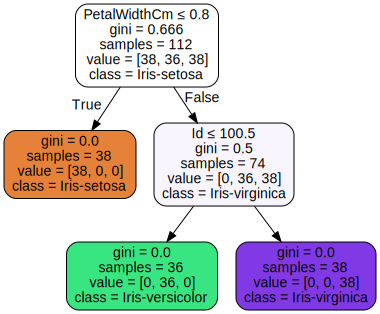

In [31]:
graph

## Classification Report

In [32]:
pred = dtree.predict(x_test)
print('Classification report : \n\n',classification_report(y_test,pred))

Classification report : 

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

